In [70]:
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from collections import Counter
from sklearn.metrics import roc_auc_score


# Z-Statistic algorithm 

In [3]:
df = pd.read_csv(
    '/Users/scottlichtenstein/Desktop/IE/Term 3/Capstone/capstone.airbus/Notebooks/generated_data/merged_dataset_with_fuel_leak.csv'
)


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.leakage.value_counts()

0    247436
1     61912
2     61610
3     61290
Name: leakage, dtype: int64

In [6]:
df

,UTC_TIME,MSN,Flight,FUEL_USED_1,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,...,leakage,DATE,TIME,FLIGHT,TOTAL_FUEL_USED,VALUE_FOB_DIFF,TOTAL_FOB_BY_QTY,DELTA_VFOB_VS_VFOBQTY,ALTITUDE_DIFF,VALUE_FOB_MISSING
0,2016-10-07 07:40:16,A400M-0002,V0926,18.685520,14.602920,11.800570,8.456606,539.7343,17862.000000,0.0,...,0,2016-10-07,07:40:16,0.0,53.545616,-1.0,17864.000000,-2.0,0.0080,55.0
1,2016-10-07 07:40:17,A400M-0002,V0926,18.790150,14.708280,11.915550,8.561913,539.7372,17862.000000,0.0,...,0,2016-10-07,07:40:17,0.0,53.975893,0.0,17864.000000,-2.0,0.0029,55.0
2,2016-10-07 07:40:18,A400M-0002,V0926,18.894430,14.812860,12.021070,8.669324,539.7568,17861.000000,0.0,...,0,2016-10-07,07:40:18,0.0,54.397684,-1.0,17864.000000,-3.0,0.0196,56.0
3,2016-10-07 07:40:19,A400M-0002,V0926,18.999000,14.917660,12.126170,8.777307,539.2781,17861.000000,0.0,...,0,2016-10-07,07:40:19,0.0,54.820137,0.0,17863.000000,-2.0,0.4787,56.0
4,2016-10-07 07:40:20,A400M-0002,V0926,19.103010,15.022960,12.231340,8.885483,539.2698,17858.000000,0.0,...,0,2016-10-07,07:40:20,0.0,55.242793,-3.0,17862.000000,-4.0,0.0083,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432243,2018-03-21 00:27:12,F-RBAJ,453.0,642.875916,646.364136,652.033813,646.515503,26496.0000,15076.916667,0.0,...,1,2018-03-21,00:27:12,980.0,2587.789368,0.0,15078.916667,-2.0,1.0000,79.0
432244,2018-03-21 00:27:13,F-RBAJ,453.0,643.186523,646.633911,652.346375,646.869507,26496.0000,15076.916667,0.0,...,1,2018-03-21,00:27:13,980.0,2589.036316,0.0,15078.916667,-2.0,0.0000,79.0
432245,2018-03-21 00:27:14,F-RBAJ,453.0,643.535217,646.980530,652.698486,647.183655,26494.0000,15075.916667,0.0,...,1,2018-03-21,00:27:14,980.0,2590.397888,-1.0,15078.916667,-3.0,2.0000,80.0
432246,2018-03-21 00:27:15,F-RBAJ,453.0,643.844299,647.289856,652.972717,647.497803,26496.0000,15076.916667,0.0,...,1,2018-03-21,00:27:15,980.0,2591.604675,1.0,15078.916667,-2.0,2.0000,79.0


In [8]:
dfx = df[["VALUE_FOB_DIFF", "leakage"]]
dfx.sample(10)

,VALUE_FOB_DIFF,leakage
345657,0.0,2
1925,0.0,0
258947,-2.0,3
110773,-4.0,0
370698,2.0,1
202174,0.0,0
105116,-2.0,0
55263,-1.0,0
106896,-4.0,0
404380,-1.0,1


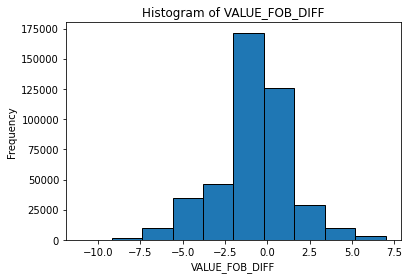

In [173]:
import matplotlib.pyplot as plt

dfx['VALUE_FOB_DIFF'].plot(kind='hist', edgecolor='black')
plt.title('Histogram of VALUE_FOB_DIFF')
plt.xlabel('VALUE_FOB_DIFF')
plt.show()


In [10]:
dfx["Label"] = np.where(dfx['leakage'] == 0, 0, 1)

/var/folders/4n/swp60yyd37qg_dmlq1v1_6jw0000gn/T/ipykernel_33096/3209289714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx["Label"] = np.where(dfx['leakage'] == 0, 0, 1)


In [17]:
dfx.Label.value_counts()

0    247436
1    184812
Name: Label, dtype: int64

In [14]:
dfx.sample(10)

,VALUE_FOB_DIFF,leakage,Label
159819,1.0,0,0
178572,0.0,0,0
356302,1.0,2,1
325074,-1.0,2,1
370173,-2.0,2,1
204129,-1.0,0,0
59564,0.0,0,0
190194,0.0,0,0
106005,-2.0,0,0
73332,-1.0,0,0


In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math

X_train, X_test, y_train, y_test = train_test_split(dfx[['VALUE_FOB_DIFF','leakage']],
                                                    dfx['Label'],
                                                    test_size=0.2,
                                                    random_state=42)

#  Calculate the z-scores for the training set
mean = X_train['VALUE_FOB_DIFF'].mean()
std = X_train['VALUE_FOB_DIFF'].std()
X_train['z_score'] = np.abs((X_train['VALUE_FOB_DIFF'] - mean) / std)

# Determine the threshold for the z-value
threshold = 0.8585858585858586  # Set the threshold value for the z-score

# Classify anomalies for the training set based on the threshold
X_train['anomaly'] = np.where(X_train['z_score'] > threshold, 1, 0)

# Evaluate the performance of the algorithm on the training set
y_train_pred = X_train['anomaly']
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print("Performance on the training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

# Apply the algorithm to the test set
X_test['z_score'] = np.abs((X_test['VALUE_FOB_DIFF'] - mean) / std)
X_test['anomaly'] = np.where(X_test['z_score'] > threshold, 1, 0)

#  Evaluate the performance on the test set
y_test_pred = X_test['anomaly']
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nPerformance on the test set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Performance on the training set:
Accuracy: 0.5006593444727847
Precision: 0.4128793746919231
Recall: 0.3963644229924219
F1 Score: 0.40445338125178915

Performance on the test set:
Accuracy: 0.500694042799306
Precision: 0.41121918118072837
Recall: 0.3943066287108581
F1 Score: 0.4025853597774487


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Initialize the best threshold and the best score
best_threshold = None
best_score = -np.inf

# Iterate over a range of possible threshold values
for threshold in np.linspace(start=0, stop=5, num=100):
    print( threshold)
    # Classify anomalies for the training set based on the threshold
    X_train['anomaly'] = np.where(X_train['z_score'] > threshold, 1, 0)
    y_train_pred = X_train['anomaly']
    
    print(y_train_pred.value_counts())


    # Calculate the score
    score = f1_score(y_train, y_train_pred)
    print(score)
    print()

    # If this threshold gives a better score, update the best threshold and the best score
    if score > best_score:
        best_threshold = threshold
        best_score = score

print('Best threshold:', best_threshold)
print('Best F1 Score:', best_score)


0.0
1    345798
Name: anomaly, dtype: int64
0.5992283153577396

0.050505050505050504
1    270065
0     75733
Name: anomaly, dtype: int64
0.5481013990698387

0.10101010101010101
1    270065
0     75733
Name: anomaly, dtype: int64
0.5481013990698387

0.15151515151515152
1    270065
0     75733
Name: anomaly, dtype: int64
0.5481013990698387

0.20202020202020202
1    270065
0     75733
Name: anomaly, dtype: int64
0.5481013990698387

0.25252525252525254
1    270065
0     75733
Name: anomaly, dtype: int64
0.5481013990698387

0.30303030303030304
1    270065
0     75733
Name: anomaly, dtype: int64
0.5481013990698387

0.35353535353535354
1    270065
0     75733
Name: anomaly, dtype: int64
0.5481013990698387

0.40404040404040403
1    270065
0     75733
Name: anomaly, dtype: int64
0.5481013990698387

0.45454545454545453
1    208640
0    137158
Name: anomaly, dtype: int64
0.4899780405926516

0.5050505050505051
0    203788
1    142010
Name: anomaly, dtype: int64
0.40445338125178915

0.5555555555555

In [54]:
X_train.leakage.value_counts()

0    197871
1     49560
2     49264
3     49103
Name: leakage, dtype: int64

In [45]:
test_data = pd.concat([X_test, y_test], axis=1)


In [58]:
df["Label"] = np.where(df['leakage'] == 0, 0, 1)

In [74]:
df

,UTC_TIME,MSN,Flight,FUEL_USED_1,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,...,DATE,TIME,FLIGHT,TOTAL_FUEL_USED,VALUE_FOB_DIFF,TOTAL_FOB_BY_QTY,DELTA_VFOB_VS_VFOBQTY,ALTITUDE_DIFF,VALUE_FOB_MISSING,Label
0,2016-10-07 07:40:16,A400M-0002,V0926,18.685520,14.602920,11.800570,8.456606,539.7343,17862.000000,0.0,...,2016-10-07,07:40:16,0.0,53.545616,-1.0,17864.000000,-2.0,0.0080,55.0,0
1,2016-10-07 07:40:17,A400M-0002,V0926,18.790150,14.708280,11.915550,8.561913,539.7372,17862.000000,0.0,...,2016-10-07,07:40:17,0.0,53.975893,0.0,17864.000000,-2.0,0.0029,55.0,0
2,2016-10-07 07:40:18,A400M-0002,V0926,18.894430,14.812860,12.021070,8.669324,539.7568,17861.000000,0.0,...,2016-10-07,07:40:18,0.0,54.397684,-1.0,17864.000000,-3.0,0.0196,56.0,0
3,2016-10-07 07:40:19,A400M-0002,V0926,18.999000,14.917660,12.126170,8.777307,539.2781,17861.000000,0.0,...,2016-10-07,07:40:19,0.0,54.820137,0.0,17863.000000,-2.0,0.4787,56.0,0
4,2016-10-07 07:40:20,A400M-0002,V0926,19.103010,15.022960,12.231340,8.885483,539.2698,17858.000000,0.0,...,2016-10-07,07:40:20,0.0,55.242793,-3.0,17862.000000,-4.0,0.0083,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432243,2018-03-21 00:27:12,F-RBAJ,453.0,642.875916,646.364136,652.033813,646.515503,26496.0000,15076.916667,0.0,...,2018-03-21,00:27:12,980.0,2587.789368,0.0,15078.916667,-2.0,1.0000,79.0,1
432244,2018-03-21 00:27:13,F-RBAJ,453.0,643.186523,646.633911,652.346375,646.869507,26496.0000,15076.916667,0.0,...,2018-03-21,00:27:13,980.0,2589.036316,0.0,15078.916667,-2.0,0.0000,79.0,1
432245,2018-03-21 00:27:14,F-RBAJ,453.0,643.535217,646.980530,652.698486,647.183655,26494.0000,15075.916667,0.0,...,2018-03-21,00:27:14,980.0,2590.397888,-1.0,15078.916667,-3.0,2.0000,80.0,1
432246,2018-03-21 00:27:15,F-RBAJ,453.0,643.844299,647.289856,652.972717,647.497803,26496.0000,15076.916667,0.0,...,2018-03-21,00:27:15,980.0,2591.604675,1.0,15078.916667,-2.0,2.0000,79.0,1


In [83]:
y_test

177986    0
110885    0
51043     0
113328    0
51057     0
         ..
242459    0
326979    1
100820    0
45155     0
53327     0
Name: Label, Length: 86450, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Define the models
models = [
    XGBClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(max_iter=1000)
]

model_names = [
    "XGBClassifier", "RandomForestClassifier", "AdaBoostClassifier",
    "GradientBoostingClassifier", "DecisionTreeClassifier",
    "LogisticRegression"
]

# Select features and target
features = df.select_dtypes(include=[np.number]).drop(
    columns=['Label', 'leakage'])
target = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

# Prepare an empty DataFrame to store the results
results = pd.DataFrame(
    columns=['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models, train, make predictions and get classification metrics
for model, name in zip(models, model_names):
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report["accuracy"]
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1 = report["macro avg"]["f1-score"]

    results = results.append(
        {
            "Model": name,
            "AUC": auc,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        },
        ignore_index=True)

# Display the results
results


Training XGBClassifier...


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:36:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training RandomForestClassifier...
Training AdaBoostClassifier...
Training GradientBoostingClassifier...
Training DecisionTreeClassifier...
Training LogisticRegression...
                        Model       AUC  Accuracy  Precision    Recall  \
0               XGBClassifier  0.880302  0.853036   0.866337  0.869428   
1      RandomForestClassifier  0.791772  0.749265   0.744646  0.747997   
2          AdaBoostClassifier  0.794961  0.710966   0.704649  0.699536   
3  GradientBoostingClassifier  0.840231  0.755628   0.750439  0.748261   
4      DecisionTreeClassifier  0.757949  0.764280   0.759202  0.757949   
5          LogisticRegression  0.671859  0.657999   0.650748  0.635356   

   F1 Score  
0  0.853000  


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [166]:
test_data = pd.concat([X_test, y_test], axis=1)

In [167]:
test_data_0 = test_data[test_data['Label'] == 0]
test_data_1 = test_data[test_data['Label'] == 1]

# Randomly sample from each dataframe
test_data_0 = test_data_0.sample(n=40000, random_state=1)
test_data_1 = test_data_1.sample(n=10000, random_state=1)

# Concatenate the two samples to get your final sample
df_sample_test = pd.concat([test_data_0, test_data_1])

In [168]:
df_sample_test.Label.value_counts()

0    40000
1    10000
Name: Label, dtype: int64

In [170]:
X_df_sample_test = df_sample_test.drop('Label', axis=1)
y_df_sample_test = df_sample_test['Label']

In [171]:
#############NEW TEST

# Prepare an empty DataFrame to store the results
results = pd.DataFrame(
    columns=['Model','AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models, train, make predictions and get classification metrics
for model, name in zip(models, model_names):
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_df_sample_test)
    y_pred_proba = model.predict_proba(X_df_sample_test)[:, 1]

    auc = roc_auc_score(y_df_sample_test, y_pred_proba)
    report = classification_report(y_df_sample_test, y_pred, output_dict=True)
    accuracy = report["accuracy"]
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1 = report["macro avg"]["f1-score"]

    results = results.append(
        {
            "Model": name,
            "AUC": auc,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        },
        ignore_index=True)

# Display the results
results

Training XGBClassifier...


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training RandomForestClassifier...
Training AdaBoostClassifier...
Training GradientBoostingClassifier...
Training DecisionTreeClassifier...
Training LogisticRegression...


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,AUC,Accuracy,Precision,Recall,F1 Score
0,XGBClassifier,0.880095,0.80204,0.748302,0.869413,0.762189
1,RandomForestClassifier,0.791938,0.75380,0.677325,0.749975,0.689038
2,AdaBoostClassifier,0.794332,0.74590,0.650781,0.698688,0.662144
3,GradientBoostingClassifier,0.838528,0.77616,0.686034,0.744337,0.701690
4,DecisionTreeClassifier,0.759137,0.78334,0.695895,0.759138,0.712714
5,LogisticRegression,0.667418,0.72502,0.607751,0.631112,0.614649


In [79]:
from sklearn.model_selection import cross_val_score

# Prepare an empty DataFrame to store the results
results = pd.DataFrame(columns=[
    'Model', 'CV Mean AUC', 'CV Std AUC', 'Accuracy', 'Precision', 'Recall',
    'F1 Score'
])

# Iterate over models, train, make predictions and get classification metrics
for model, name in zip(models, model_names):
    print(f"Training and performing cross-validation on {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Perform cross-validation and get AUC scores
    cv_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report["accuracy"]
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1 = report["macro avg"]["f1-score"]

    results = results.append(
        {
            "Model": name,
            "CV Mean AUC": cv_auc.mean(),
            "CV Std AUC": cv_auc.std(),
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        },
        ignore_index=True)

# Display the results
results



Training and performing cross-validation on XGBClassifier...


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:52:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:52:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:52:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:53:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:53:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training and performing cross-validation on RandomForestClassifier...
Training and performing cross-validation on AdaBoostClassifier...
Training and performing cross-validation on GradientBoostingClassifier...
Training and performing cross-validation on DecisionTreeClassifier...
Training and performing cross-validation on LogisticRegression...


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

,Model,CV Mean AUC,CV Std AUC,Accuracy,Precision,Recall,F1 Score
0,XGBClassifier,0.878254,0.001295,0.853036,0.866337,0.869428,0.853000
1,RandomForestClassifier,0.805786,0.000833,0.748942,0.744292,0.747597,0.745346
2,AdaBoostClassifier,0.794761,0.002107,0.710966,0.704649,0.699536,0.701228
3,GradientBoostingClassifier,0.838821,0.002915,0.755628,0.750439,0.748261,0.749209
4,DecisionTreeClassifier,0.736967,0.001978,0.765286,0.760220,0.759084,0.759613
5,LogisticRegression,0.670906,0.001890,0.657999,0.650748,0.635356,0.635670
